In [99]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import random as rd


In [100]:
# County sort by price
# Import file
county_res = pd.read_csv("Final_Clean_Restaurants.csv")

county_res.head()

,Unnamed: 0,Name,Category,Biz City,Biz Zip,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County
0,0,Railroad Station Bar and Grill,"['American (New)', 'Southern', 'Pubs']",Cloverdale,95425.0,38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma
1,1,Hamburger Ranch & Bar-B-Que,"['Barbeque', 'Burgers']",Cloverdale,95425.0,38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma
2,2,Trading Post,"['Bakeries', 'American (New)', 'Bars']",Cloverdale,95425.0,38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma
3,3,Cloverdale Ale Company,"['Pubs', 'Beer Bar', 'American (Traditional)']",Cloverdale,95425.0,38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma
4,4,Piacere Italiano Steak and Seafood,"['Italian', 'Steakhouses', 'Seafood']",Cloverdale,95425.0,38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma


In [101]:
Price= county_res["Price"].replace(['NAN'], 'Unavailable')

Price

county_res["Price"] = Price
                                     

county_res.head()

,Unnamed: 0,Name,Category,Biz City,Biz Zip,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County
0,0,Railroad Station Bar and Grill,"['American (New)', 'Southern', 'Pubs']",Cloverdale,95425.0,38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma
1,1,Hamburger Ranch & Bar-B-Que,"['Barbeque', 'Burgers']",Cloverdale,95425.0,38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma
2,2,Trading Post,"['Bakeries', 'American (New)', 'Bars']",Cloverdale,95425.0,38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma
3,3,Cloverdale Ale Company,"['Pubs', 'Beer Bar', 'American (Traditional)']",Cloverdale,95425.0,38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma
4,4,Piacere Italiano Steak and Seafood,"['Italian', 'Steakhouses', 'Seafood']",Cloverdale,95425.0,38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma


In [102]:
#sort price by county

county_res['count'] = 1

table = county_res.groupby(['County','Price']).count()['count']

table


County        Price      
Alameda       $              1999
              $$             2051
              $$$              55
              $$$$              9
              Unavailable     521
Contra Costa  $               867
              $$              819
              $$$              23
              $$$$              2
              Unavailable     182
Marin         $               156
              $$              310
              $$$              26
              $$$$              1
              Unavailable      59
Napa          $                83
              $$              147
              $$$              22
              $$$$             10
              Unavailable      30
SF            $              1354
              $$             2697
              $$$             329
              $$$$            122
              Unavailable     369
San Mateo     $               602
              $$              785
              $$$              48
              $$$$    

In [103]:
# users = [13000, 26000, 52000, 30000, 9000]
# x_axis = np.arange(len(users))

#$$ configuration aggregate
Price_df = county_res['Price'].value_counts()

Price_df



$$             9715
$              7632
Unavailable    1852
$$$             618
$$$$            181
Name: Price, dtype: int64

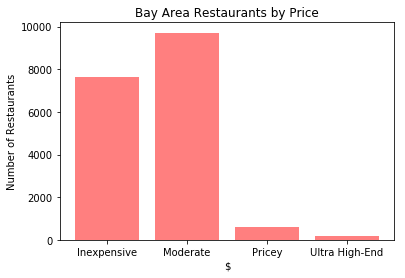

In [104]:
number = [7632, 9715,618, 181]
x_axis = np.arange(len(number))

# #xticks gives the location
#["$", "$$", "$$$", "$$$$"])
    
# Tell matplotlib that we will be making a bar chart
# number is our y axis 

plt.bar(x_axis, number, color='r', alpha=0.5, align="center") 


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Inexpensive", "Moderate", "Pricey", "Ultra High-End"])

plt.title("Bay Area Restaurants by Price")
plt.ylabel("Number of Restaurants")
plt.xlabel("$")

plt.savefig("Restaurantsbyprice.png")

plt.show()


In [105]:
#drop ratings below 3.5

Rating_df = county_res.loc[(county_res['Rating']>=3.5)]

Rating_df



,Unnamed: 0,Name,Category,Biz City,Biz Zip,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County,count
0,0,Railroad Station Bar and Grill,"['American (New)', 'Southern', 'Pubs']",Cloverdale,95425.0,38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma,1
1,1,Hamburger Ranch & Bar-B-Que,"['Barbeque', 'Burgers']",Cloverdale,95425.0,38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma,1
2,2,Trading Post,"['Bakeries', 'American (New)', 'Bars']",Cloverdale,95425.0,38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma,1
3,3,Cloverdale Ale Company,"['Pubs', 'Beer Bar', 'American (Traditional)']",Cloverdale,95425.0,38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma,1
4,4,Piacere Italiano Steak and Seafood,"['Italian', 'Steakhouses', 'Seafood']",Cloverdale,95425.0,38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma,1
5,5,Railroad Square Bar and Grill,['Restaurants'],Cloverdale,95425.0,38.802877,-123.015909,4.0,7,Unavailable,VmRLVJ4QPJCC3ZoxHCAdvA,Sonoma,1
6,6,Papa's Pizza Cafe,"['Pizza', 'Salad', 'Sandwiches']",Cloverdale,95425.0,38.805326,-123.017612,4.5,85,$$,bwp-KNxkgfQhsbaBYYvqdw,Sonoma,1
7,7,MoE's Eagles Nest Deli,['Delis'],Cloverdale,95425.0,38.805669,-123.017421,3.5,61,$,mweczDf0CB-zt4JsremEPQ,Sonoma,1
8,8,La Hacienda,['Mexican'],Cloverdale,95425.0,38.806535,-123.017846,3.5,83,$$,aPow7ctyoPiaMGzHhzfZvQ,Sonoma,1
9,9,Picks Drive-In,"['Burgers', 'Ice Cream & Frozen Yogurt', 'Sand...",Cloverdale,95425.0,38.804752,-123.017062,3.5,167,$$,qqVysA8ns692wucr7ftr8w,Sonoma,1


In [106]:
#sort rating by county

Rating_df['count'] = 1

rating_table = Rating_df.groupby(['County','Rating']).count()['count']



rating_table



C:\Users\Loba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


County        Rating
Alameda       3.5       1220
              4.0       1420
              4.5        531
              5.0        119
Contra Costa  3.5        430
              4.0        551
              4.5        186
              5.0         56
Marin         3.5        155
              4.0        177
              4.5         75
              5.0         18
Napa          3.5         60
              4.0        104
              4.5         31
              5.0         12
SF            3.5        985
              4.0       2386
              4.5        899
              5.0        119
San Mateo     3.5        458
              4.0        485
              4.5        134
              5.0         37
Santa Clara   3.5       1225
              4.0       1214
              4.5        366
              5.0        101
Solano        3.5        152
              4.0        164
              4.5         76
              5.0         15
Sonoma        3.5        196
              4.0     

In [107]:
#naming columns


rating_table.to_csv("Ratingscounty.csv")

Ratings = pd.read_csv("Ratingscounty2.csv")

Ratings

C:\Users\Loba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


,County,Ratings,Number
0,Alameda,3.5,1220
1,Alameda,4.0,1420
2,Alameda,4.5,531
3,Alameda,5.0,119
4,Contra Costa,3.5,430
5,Contra Costa,4.0,551
6,Contra Costa,4.5,186
7,Contra Costa,5.0,56
8,Marin,3.5,155
9,Marin,4.0,177


In [108]:
#get average with groupby

Average_Ratings = Ratings.groupby(['Number']).mean()

Average_Ratings



,Ratings
Number,
12,5.0
15,5.0
18,5.0
29,5.0
31,4.5
37,5.0
56,5.0
60,3.5
75,4.5


In [109]:


#get the average number by rating




Avg_Numbers = Ratings.groupby(['County']).mean().sort_values('Number', ascending = False)

Avg_Numbers




,Ratings,Number
County,,
SF,4.25,1097.25
Alameda,4.25,822.50
Santa Clara,4.25,726.50
Contra Costa,4.25,305.75
San Mateo,4.25,278.50
Sonoma,4.25,182.75
Marin,4.25,106.25
Solano,4.25,101.75
Napa,4.25,51.75


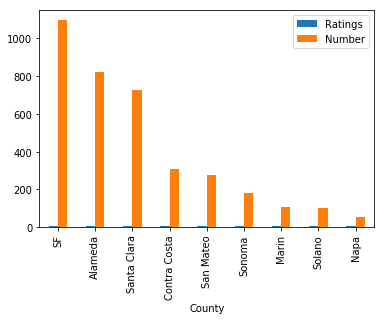

In [112]:
# % matplotlib inline

Avg_Numbers.plot.bar()
plt.show()

In [ ]:
data = 1220,1420,531,119
Alameda=  3.5,4.0, 4.5,5.0            